# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = 'data/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

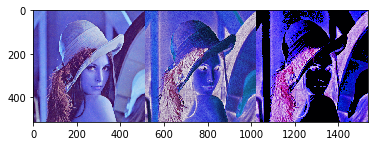

In [9]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hls_down = img_hls.astype('float32')
img_hls_down[..., -1] = img_hls_down[..., -1]/255 - change_percentage
img_hls_down[img_hls_down[..., -1] < 0] = 0
img_hls_down[..., -1] = img_hls_down[..., -1]*255
img_hls_down = img_hls_down.astype('uint8')

# 在 HSV color space 增加飽和度
img_hls_up = img_hls.astype('float32')
img_hls_up[..., -1] = img_hls_up[..., -1]/255 + change_percentage
img_hls_up[img_hls_up[..., -1] > 1] = 1
img_hls_up[..., -1] = img_hls_up[..., -1]*255
img_hls_up = img_hls_up.astype('uint8')

# 轉換 color space 回 BGR
img_hls_down = cv2.cvtColor(img_hls_down, cv2.COLOR_HLS2BGR)
img_hls_up = cv2.cvtColor(img_hls_up, cv2.COLOR_HLS2BGR)

# 組合圖片 + 顯示圖片
img_hls_change = np.hstack((img, img_hls_down, img_hls_up))
plt.imshow(img_hls_change)

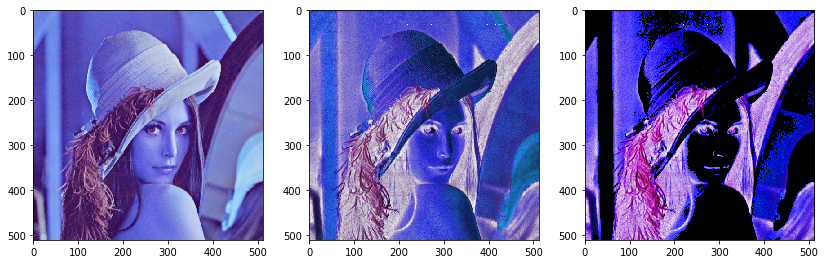

In [10]:
plt.figure(figsize=(14,14))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img_hls_down)
plt.subplot(133)
plt.imshow(img_hls_up)

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

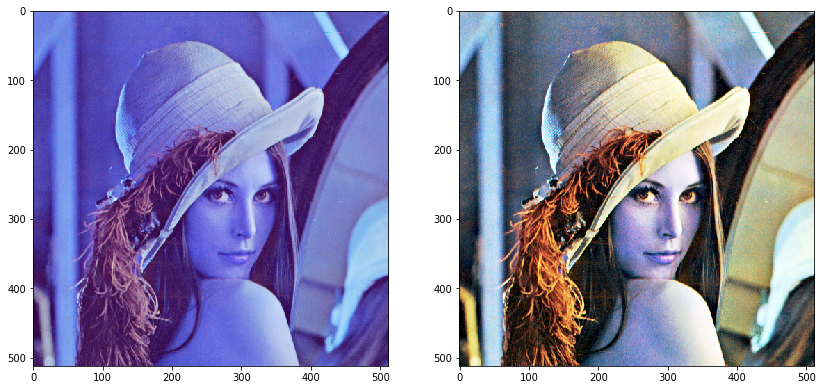

In [12]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
equalHist_by_channel_1 = cv2.equalizeHist(img[...,0])
equalHist_by_channel_2 = cv2.equalizeHist(img[...,1])
equalHist_by_channel_3 = cv2.equalizeHist(img[...,2])
equalHist_by_channel = np.dstack((equalHist_by_channel_1,
                                  equalHist_by_channel_2,
                                  equalHist_by_channel_3))
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(equalHist_by_channel)

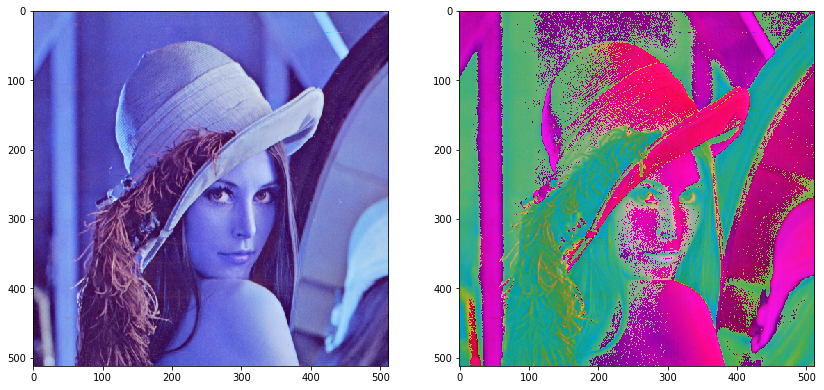

In [13]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
img_hls_equalHist_by_channel_1 = cv2.equalizeHist(img_hls[...,1])
img_hls_equalHist_by_channel = np.dstack((img_hls_equalHist_by_channel_1,
                                          img_hls[...,0],
                                          img_hls[...,2]))
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_hls_equalHist_by_channel)

## 調整對比 / 明亮

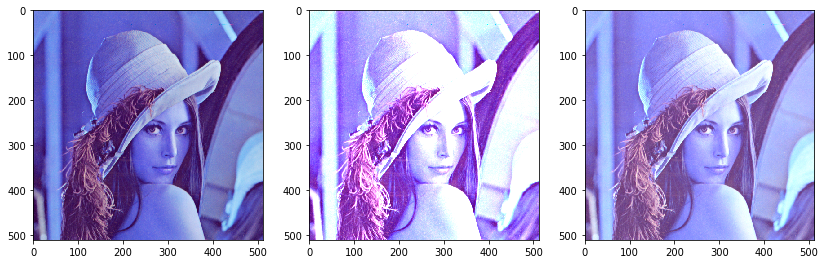

In [14]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)


# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
plt.figure(figsize=(14,14))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(add_contrast)
plt.subplot(133)
plt.imshow(add_lighness)